<a href="https://colab.research.google.com/github/hagohel/Face-Recognition-in-Google-Colab/blob/master/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0

In [2]:
!pip install face_recognition==1.2.2

     |████████████████████████████████| 100.2MB 104kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=0867795c1c72d330728facfa15c1f8a4b266b0659a86f0f7eb1d0abfa9b046ec
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
#!pip install dlib==19.8.1
!pip install pillow

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1585724130474421979
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9327604212752969030
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14880555585068068699
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7821537062092298856
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [0]:
import PIL.Image
import PIL.ImageDraw
import face_recognition

In [0]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("image.jpg")
#image = face_recognition.load_image_file("People.jpg")

In [0]:
# Find all the faces in the image
face_locations = face_recognition.face_locations(image)

In [8]:
number_of_faces = len(face_locations)
print("I found {} face(s) in this photograph.".format(number_of_faces))

I found 1 face(s) in this photograph.


In [0]:
# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

In [11]:
for face_location in face_locations:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="red")

A face is located at pixel location Top: 246, Left: 451, Bottom: 708, Right: 913


In [0]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline

In [0]:
from IPython.display import Image

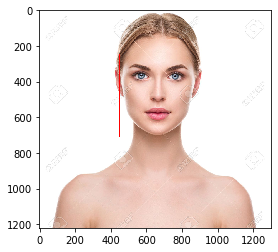

In [14]:
# Display the image on screen
imshow(pil_image)

In [0]:
# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

In [16]:
# Loop over each face
for face_landmarks in face_landmarks_list:

    # Loop over each facial feature (eye, nose, mouth, lips, etc)
    for name, list_of_points in face_landmarks.items():

        # Print the location of each facial feature in this image
        print("The {} in this face has the following points: {}".format(name, list_of_points))

        # Let's trace out each facial feature in the image with a line!
        draw.line(list_of_points, fill="red", width=2)

The chin in this face has the following points: [(469, 363), (473, 416), (480, 468), (489, 522), (503, 573), (529, 620), (565, 661), (611, 692), (662, 703), (712, 693), (757, 665), (795, 626), (824, 581), (842, 531), (852, 478), (861, 424), (865, 371)]
The left_eyebrow in this face has the following points: [(498, 317), (530, 304), (564, 305), (595, 316), (627, 331)]
The right_eyebrow in this face has the following points: [(713, 331), (744, 316), (777, 308), (811, 309), (840, 327)]
The nose_bridge in this face has the following points: [(670, 375), (669, 409), (668, 443), (667, 478)]
The nose_tip in this face has the following points: [(638, 503), (651, 509), (666, 515), (682, 510), (697, 504)]
The left_eye in this face has the following points: [(534, 372), (557, 355), (589, 357), (611, 381), (583, 389), (553, 388)]
The right_eye in this face has the following points: [(726, 382), (747, 358), (779, 358), (802, 376), (781, 391), (752, 390)]
The top_lip in this face has the following p

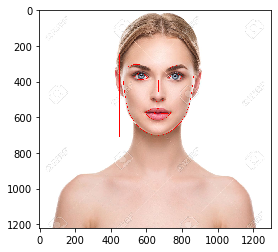

In [17]:
# Display the image on screen
imshow(pil_image)


In [0]:
# Generate the face encodings
face_encodings = face_recognition.face_encodings(image)

In [19]:
if len(face_encodings) == 0:
    # No faces found in the image.
    print("No faces were found.")

else:
    # Grab the first face encoding
    first_face_encoding = face_encodings[0]

    # Print the results
    print(first_face_encoding)

[-0.12693486  0.03771963  0.08223911 -0.05928505 -0.17573741 -0.01692439
 -0.05835922 -0.07012729  0.20413104 -0.13298443  0.14048961 -0.05181336
 -0.29499808  0.03892677 -0.1013494   0.1710116  -0.18887909 -0.18329956
 -0.01802467 -0.06795924  0.07595491  0.03823262 -0.01293711  0.11832014
 -0.07635561 -0.3013531  -0.09265919 -0.01303908 -0.02875812 -0.10952024
 -0.02130522  0.18269378 -0.17440279 -0.03290708 -0.03102034  0.19298328
  0.00711532 -0.14347957  0.13538311  0.04138616 -0.19659257 -0.00711707
  0.03009059  0.28676903  0.16985498  0.01825368  0.04285224 -0.09666658
  0.07097914 -0.39470321 -0.00966334  0.1795896   0.08091904 -0.00360384
  0.1053709  -0.21903482  0.01593761  0.11202146 -0.15486719  0.11884912
  0.04025212 -0.1839013   0.04696765 -0.18108556  0.28133947  0.12316899
 -0.12678485 -0.14124227  0.22011153 -0.18431096 -0.16716014  0.11754751
 -0.05357703 -0.19743022 -0.36645561  0.0201959   0.36306629  0.17771553
 -0.17025103  0.12640153 -0.04587022 -0.0294598  -0

In [0]:
import face_recognition
image_of_person_1 = face_recognition.load_image_file("image.jpg")

In [0]:
person_1_face_encoding = face_recognition.face_encodings(image_of_person_1)[0]


In [0]:
known_face_encodings = [
    person_1_face_encoding
]

In [0]:
unknown_image = face_recognition.load_image_file("image.jpg")
#unknown_image1 = face_recognition.load_image_file("Arya2.jpg")

In [0]:
face_locations = face_recognition.face_locations(unknown_image, number_of_times_to_upsample=2)
unknown_face_encodings = face_recognition.face_encodings(unknown_image, known_face_locations=face_locations)

In [0]:
for unknown_face_encoding in unknown_face_encodings:
  results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)
  name = "Unknown"

  if results[0]:
    name = "Model"
  else:
    name = "Unknown"

    print(f"Found {name} in the photo!")

In [0]:
#face_landmarks_list = face_recognition.face_landmarks(image)
#pil_image = Image.fromarray(image)
face_landmarks_list = face_recognition.face_landmarks(unknown_image)
#pil_image = Image.fromarray(unknown_image)

In [0]:
from PIL import Image, ImageDraw, ImageFont
d = ImageDraw.Draw(pil_image, 'RGBA')

In [0]:
for face_landmarks in face_landmarks_list:
  d.line(face_landmarks['left_eyebrow'], fill=(128, 0, 128, 100), width=3)
  d.line(face_landmarks['right_eyebrow'], fill=(128, 0, 128, 100), width=3)
  d.polygon(face_landmarks['top_lip'], fill=(128, 0, 128, 100))
  d.polygon(face_landmarks['bottom_lip'], fill=(128, 0, 128, 100))

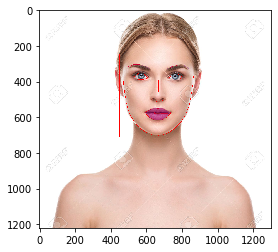

In [30]:
imshow(pil_image)